In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = loadmat('../data/ex7data1.mat')
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X'])


In [3]:
dataset = data['X']
dataset.shape

(300, 2)

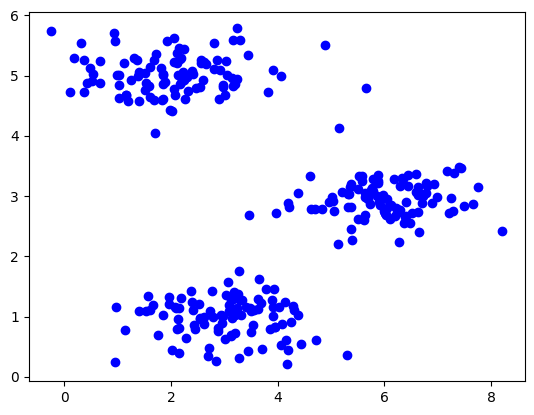

In [4]:
def show_cluster(dataset, cluster, centroids=None):
    # dataset: 数据
    # centroids: 聚类中心点的坐标
    # cluster: 每个样本所属聚类
    colors = ['blue', 'red', 'green', 'purple']
    markers = ['o', '^', 's', 'd']

    k = len(np.unique(cluster))
    for i in range(k):
        plt.scatter(dataset[cluster == i, 0], dataset[cluster == i, 1],
                   color=colors[i], marker=markers[i])
    
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1],
                   color=colors[i], marker='+', s=150)

    plt.show()

# 初始时不区分类别
show_cluster(dataset, np.zeros(len(dataset), dtype=int))

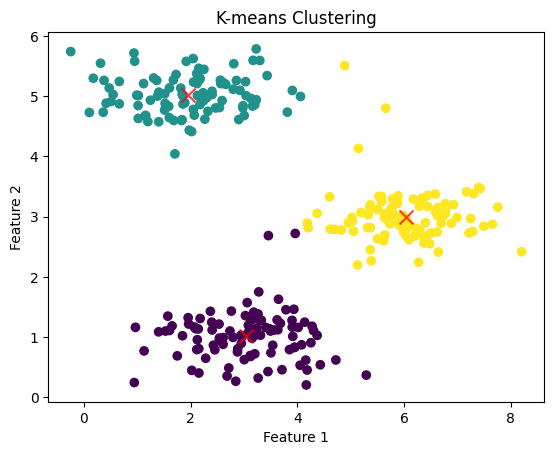

In [5]:
# 指定要聚类的个数
k = 3

# 创建 KMeans 对象
kmeans = KMeans(n_clusters=k, random_state=0)

# 进行聚类
kmeans.fit(dataset)

# 获取聚类中心
centroids = kmeans.cluster_centers_

# 获取聚类标签
labels = kmeans.labels_

# 可视化结果
plt.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, alpha=0.75, marker='x')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()